# Realizar el ajuste con los residuos regresion lineal

In [10]:
library(sp)
library(raster)

In [1]:
getwd()

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Script"

In [2]:
setwd(r"(C:\Users\AGPRES\Jupyter_Python\AGPRES\Datos_suelo\Satelite\Sentinel2\Bandas)")

In [3]:
dir_prediccion <- paste(getwd(),"/Banda_select/RASTER_PREDICCION/",sep = "")
dir_prediccion

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/"

In [4]:
dir_residuo <- paste(getwd(),"/SHP/Raster_residuo/",sep = "")
dir_residuo

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/"

In [5]:
# Crear lista del directorio
Lista_prediccion <- list.files(path = dir_prediccion, pattern = '.*.tif$',full.names = T)
Lista_prediccion

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Al.tif"     
 [2] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Arcilla.tif"
 [3] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Arena.tif"  
 [4] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_BT.tif"     
 [5] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Ca.tif"     
 [6] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_CE.tif"     
 [7] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_CICe.tif"   
 [8] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_K.tif"      
 [9] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Limo.tif"   
[10] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_Mg.tif"     
[11] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_MO.tif"     
[12] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_N.tif"      
[13] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_P.tif"      
[14] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_pH.tif"     
[15] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/Banda_select/RASTER_PREDICCION/Prediccion_SAl.tif"

In [6]:
length(Lista_prediccion)

[1] 15

In [7]:
# Crear lista de SHP del directorio
Lista_residuo <- list.files(path = dir_residuo, pattern = '.*.tif$',full.names = T)
Lista_residuo

[1] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Al.shp.tif" 
 [2] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Arcilla.tif"
 [3] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Arena.s.tif"
 [4] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_BT.shp.tif" 
 [5] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Ca.shp.tif" 
 [6] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_CE.shp.tif" 
 [7] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_CICe.sh.tif"
 [8] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_K.shp.tif"  
 [9] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Limo.sh.tif"
[10] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_Mg.shp.tif" 
[11] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_MO.shp.tif" 
[12] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_N.shp.tif"  
[13] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_P.shp.tif"  
[14] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_pH.shp.tif" 
[15] "C:/Users/AGPRES/Jupyter_Python/AGPRES/Datos_suelo/Satelite/Sentinel2/Bandas/SHP/Raster_residuo/Residuo_Residuales_SAl.shp.tif"

In [8]:
length(Lista_residuo)

[1] 15

In [11]:
raster_residuo <- stack(Lista_residuo)
raster_prediccion <- stack(Lista_prediccion)

In [12]:
names(raster_residuo)

[1] "Residuo_Residuales_Al.shp"  "Residuo_Residuales_Arcilla"
 [3] "Residuo_Residuales_Arena.s" "Residuo_Residuales_BT.shp" 
 [5] "Residuo_Residuales_Ca.shp"  "Residuo_Residuales_CE.shp" 
 [7] "Residuo_Residuales_CICe.sh" "Residuo_Residuales_K.shp"  
 [9] "Residuo_Residuales_Limo.sh" "Residuo_Residuales_Mg.shp" 
[11] "Residuo_Residuales_MO.shp"  "Residuo_Residuales_N.shp"  
[13] "Residuo_Residuales_P.shp"   "Residuo_Residuales_pH.shp" 
[15] "Residuo_Residuales_SAl.shp"

In [13]:
names(raster_prediccion)

[1] "Prediccion_Al"      "Prediccion_Arcilla" "Prediccion_Arena"  
 [4] "Prediccion_BT"      "Prediccion_Ca"      "Prediccion_CE"     
 [7] "Prediccion_CICe"    "Prediccion_K"       "Prediccion_Limo"   
[10] "Prediccion_Mg"      "Prediccion_MO"      "Prediccion_N"      
[13] "Prediccion_P"       "Prediccion_pH"      "Prediccion_SAl"

In [14]:
name_prediccion <- c("Predic_AL","Predic_Arcilla","Predic_Arena",
                     "Predic_BT","Predic_CA","Predic_CE",
                     "Predic_CICe","Predic_K","Predic_Limo",
                     "Predic_MG","Predic_MO","Predic_N",
                     "Predic_P","Predic_PH","Predic_SAl")

In [15]:
names(raster_prediccion) <- name_prediccion

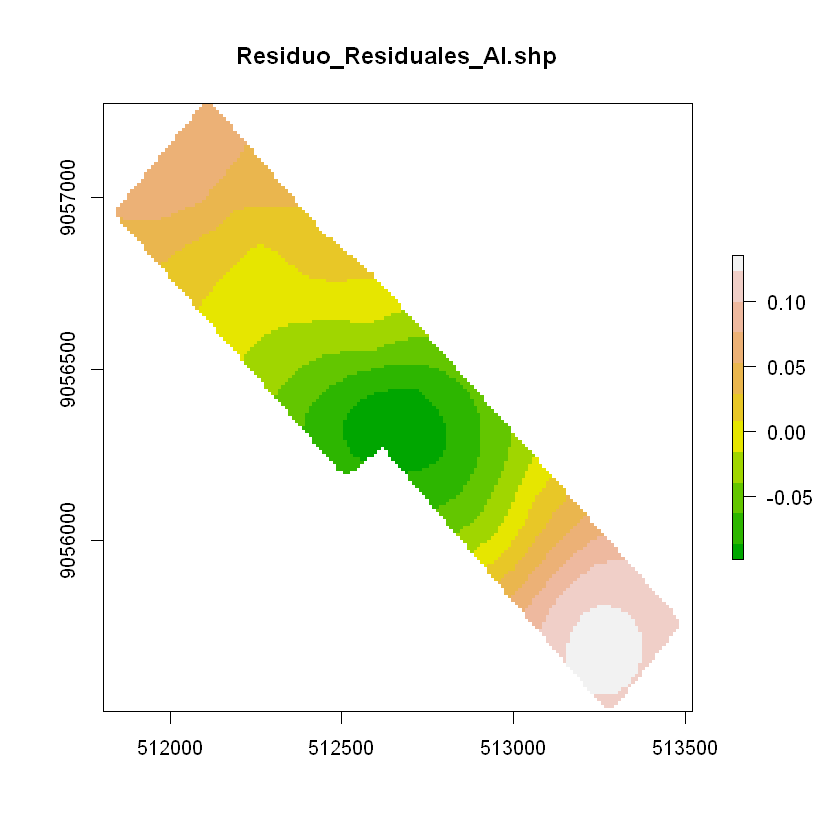

In [16]:
plot(raster_residuo[[1]], col = terrain.colors(11), main = names(raster_residuo[[1]]))

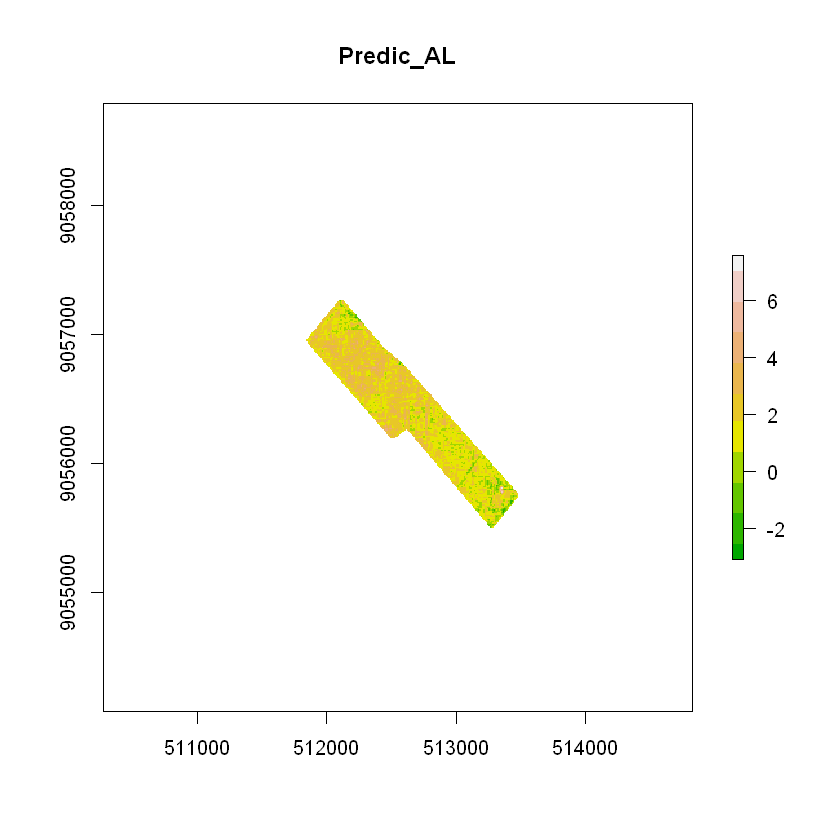

In [17]:
plot(raster_prediccion[[1]], col = terrain.colors(11), main = names(raster_prediccion[[1]]))

In [18]:
for (i in 1:length(Lista_residuo)){
    R_Prediccion <- raster_prediccion[[i]]
    R_Residuo <- raster_residuo[[i]]
    # Resamplear pixcel
    R_Prediccion1 <- resample(R_Prediccion, R_Residuo)
    # Recortar con el raster para obtener la misma dimension
    R_Prediccion1_clip <- crop(R_Prediccion1, R_Residuo)
    R_Ajuste <- R_Prediccion1_clip + R_Residuo
    name_suelo <- name_prediccion[i]
    # Crear una carpeta con el nombre ID imagen y agregar texto
    out_dir <- paste(getwd(), '//Prediccion_ajuste', sep='')
    suppressWarnings(dir.create(out_dir))
    # Exportando el raster
    writeRaster(R_Ajuste, paste(out_dir,"/Ajuste_", name_suelo,".tif",sep = ""), drivername="Gtiff",overwrite=TRUE)
    }